In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glider import Glider
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import CheckpointCallback
import pickle
from stable_baselines3.common.env_checker import check_env
from matplotlib.patches import Ellipse

/Users/iandavenport/Desktop/research/projects/gliding/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
glider = Glider(u0=0.0, v0=0.01, w0=0.0)

checkpoint_callback = CheckpointCallback(
    save_freq=50_000,
    save_path="./big_state_models/",
    name_prefix="rl_model",
)

/Users/iandavenport/Desktop/research/projects/gliding/venv/lib/python3.7/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


In [3]:
glider.hit_ground.terminal

True

In [4]:
while glider.y[-1] > glider.terminal_y:
    glider.forward(beta_dot=0)

In [5]:
len(glider.y)

114

In [6]:
glider.y[-1]

-10.0

In [ ]:
model = PPO("MlpPolicy", glider, verbose=1, tensorboard_log="big_state_logs/")
model.learn(total_timesteps=5e5, callback=checkpoint_callback)

In [ ]:
glider = Glider(u0=0.25, v0=-0.25, w0=0.1)
model = PPO.load("big_state_models/rl_model_500000_steps.zip", env=glider)
done = False
obs = glider.reset()
while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, _ = glider.step(action.item())

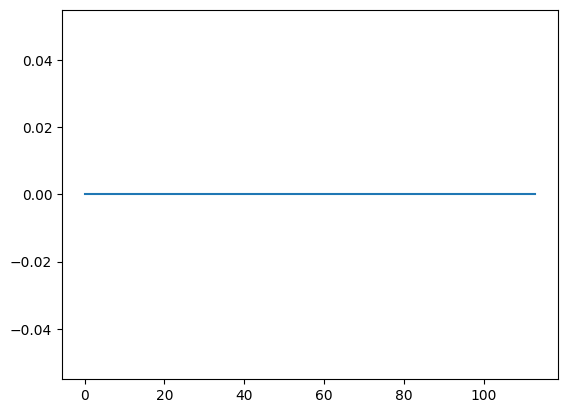

In [7]:
plt.plot(glider.theta)

In [ ]:
plt.scatter(glider.x, glider.y)

In [ ]:
plt.plot(glider.beta)

In [ ]:
def save_history(glider: Glider, filename: str) -> None:
    """
    Save the full history of the glider in a dictionary
    """
    history = {
        "u": glider.u,
        "v": glider.v,
        "w": glider.w,
        "x": glider.x,
        "y": glider.y,
        "theta": glider.theta,
        "beta": glider.beta,
    }
    with open(filename + ".pkl", "wb") as f:
        pickle.dump(history, f)

In [ ]:
save_history(glider=glider, filename="history")

In [ ]:
# ell = Ellipse(
#         xy = (1, 1),
#         width = 1,
#         height = 0.3,
#         angle = np.rad2deg(np.pi/2.5)
#         )
# fig, ax = plt.subplots()
# ax.add_artist(ell)
# ax.set_xlim(-5, 5)
# ax.set_ylim(-5, 5)
# plt.show()